In [1]:
import readspc
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import struct

In [2]:
path = 'PNNL FTIR Data/Proposal 67367/Bruker Spectrometer/DATABASE-SERDP-4-0-Aug-2018-Acetol-Croto/'

In [3]:
def load_spc(fname):
    hdr, subhdr, x, y = readspc.read(fname)
    return hdr, subhdr, x, y

def load_spc_dir(dir):
    fnames = [file for p in os.walk(dir) for file in glob(os.path.join(p[0], '*.SPC'))]
    hdrs, subhdrs, xs, ys = [],[],[],[]
    for fname in fnames:
        hdr, subhdr, x, y = load_spc(fname)
        hdrs.append(hdr)
        subhdrs.append(subhdr)
        xs.append(x)
        ys.append(y)
    return fnames, hdrs, subhdrs, xs, ys

In [4]:
fnames,hdrs,subhdrs,xs,ys = load_spc_dir(path)


In [5]:
xs[0]

array([7299.981305  , 7299.92104033, 7299.86077565, ...,  550.09679835,
        550.03653367,  549.976269  ])

In [10]:
for fname, hdr, subhdr, x, y in zip(fnames,hdrs,subhdrs,xs,ys):
    file = fname.split('/')[-1].split('.')[0]
    plt.figure()
    plt.xlabel('Wavenumbers (1/cm)')
    plt.ylabel('Absorbance (base-10)')
    plt.plot(x,y)
    plt.title(file)
    plt.savefig('figures/'+file+'.png')
    plt.close()

In [11]:
df = pd.DataFrame(ys)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (119,) + inhomogeneous part.

In [2]:
fname = "PNNL FTIR Data/Proposal 67367/Bruker Spectrometer/DATABASE-SERDP-4-0-Aug-2018-Acetol-Croto/Menthol/MENTHOL_25T.SPC"
hdr, subhdr, x, y = read(fname)

In [ ]:
for x,y in zip(xs,ys):
    plt.plot()

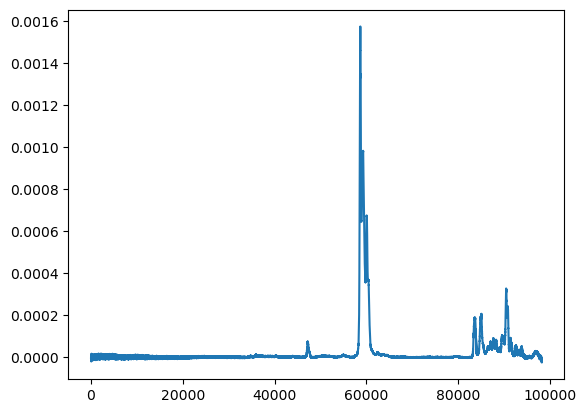

In [5]:
plt.plot(y)

In [6]:
hdr.keys()

dict_keys(['exper', 'exp', 'npts', 'first', 'last', 'nsub', 'xtype', 'ytype', 'ztype', 'post', 'date', 'res', 'source', 'peakpt', 'spare', 'cmnt', 'catxt', 'logoff', 'mods', 'procs', 'level', 'sampin', 'factor', 'method', 'zinc', 'planes', 'winc', 'wtype', 'reserv'])

In [7]:
n_pts = hdr['npts']

In [8]:
try:
    file = open(fname, 'rb')
except TypeError:
    raise(ValueError('error'))

In [9]:
file.tell()

0

In [10]:
tflags, versn = struct.unpack('BB', file.read(2))

In [11]:
print(tflags)
print(versn)
print(file.tell())

0
75
2


In [12]:
hdr = 

SyntaxError: invalid syntax (2532018721.py, line 1)

In [ ]:
endian = '<'
fmt = endian + 'f'*n_pts

In [ ]:
x = np.array(struct.unpack(fmt, file.read(struct.calcsize(fmt))))

In [ ]:
x.shape

(99148,)

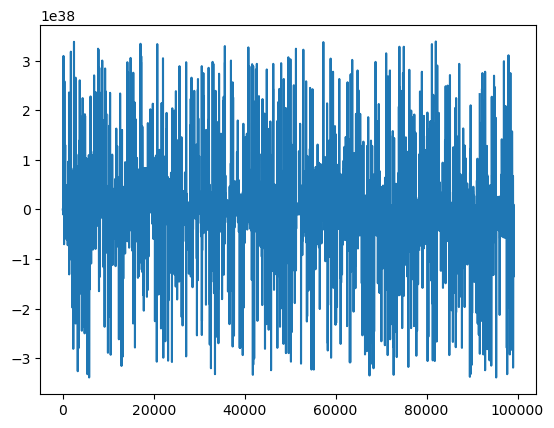

In [ ]:
plt.plot(x)

In [ ]:
cpos = file.tell()

file.seek(0, os.SEEK_END)
eof = file.tell()
remain = eof-cpos
B=4
num = remain/(n_pts*B + 32)

In [ ]:
remain

1008

In [ ]:
num

0.0025414498366210818

In [ ]:
if num != 1:
    print('fail')

fail
